In [70]:
import numpy as np
from random import seed
import copy, random
import time
import subprocess
import matplotlib.pyplot as plt
import numpy as np


types = ["insertionsort.cpp", "mergesort.cpp",
         "qsort.cpp", "nlognqsort.cpp",
         "heapsort.cpp", "stringsort.cpp",
         "stringbinsearchsort.cpp", "skiplistsort.cpp"]

def run_sort(command, input_data):
    res = subprocess.run(command, input=input_data, text=True, stdout=subprocess.PIPE, shell=True)
    return res.stdout

In [6]:
# insertionsort_range range (1, 11000)
# mergesortrange range (1, 100100)
# qsortrange range (1, 100100)
# heapsortrange range (1, 100100)

In [90]:
# sort_type = 7
# ntests = 10000
# compile_command = f"g++ {types[sort_type]} -o test"
# subprocess.run(compile_command, shell=True)
# exec_command  = "./test"
# skiplist_height_results = []
# for i, n in enumerate([10, 100, 1000, 10000, 100000, 1000000, 3000000]):
#     skiplist_height_results += [[]]
#     for height in range(50):
#         input_data = str(n) + ' ' + str(height + 1)
#         exec_time = run_sort(exec_command, input_data)
#         skiplist_height_results[i] += [float(exec_time)]
# skiplist_height_results 

In [98]:
# mergesortrange = []
# sort_type = 1
# compile_command = f"g++ {types[sort_type]} -o test"
# subprocess.run(compile_command, shell=True)
# exec_command  = "./test"
# text_file = open("sample.txt", "w")
# for n in range(1, 49805):
#     input_data = str(n)
#     exec_time = run_sort(exec_command, input_data)
#     mergesortrange[n - 1] = [float(exec_time)]
#     text_file.write(exec_time)
# text_file.close()


In [32]:
# qsortrange = []
# sort_type = 2
# compile_command = f"g++ {types[sort_type]} -o test"
# subprocess.run(compile_command, shell=True)
# exec_command  = "./test"
# text_file = open("sample.txt", "w")
# for n in range(1, 100100):
#     input_data = str(n)
#     exec_time = run_sort(exec_command, input_data)
#     qsortrange += [float(exec_time)]
#     text_file.write(exec_time)
# text_file.close()

# Insertion Sort Graph

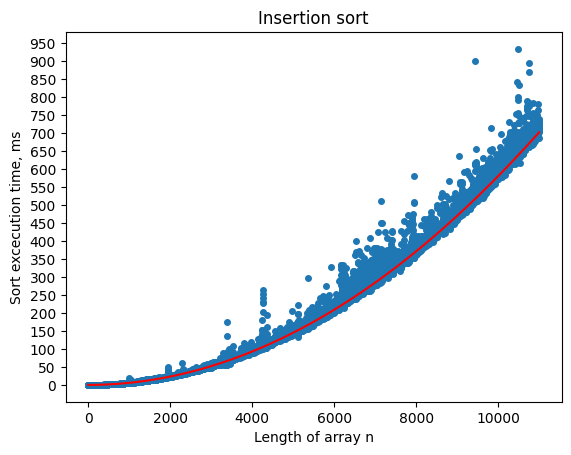

In [73]:
x = [n for n in range(1, 11000)]
y = [1000 * el for el in insertionsort_range]
x1 = np.arange(0, 11000, 0.1)
y1 = 5.8 * x1**2 / 1000000
plt.plot(x, y, marker='o', markersize=4, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 40
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Insertion sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

In [77]:
# Merge Sort Graph

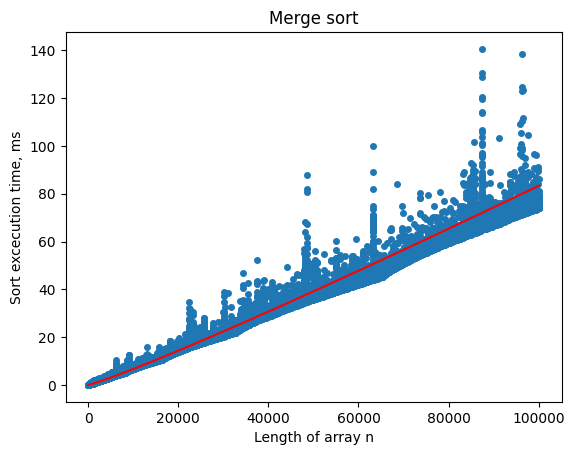

In [100]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in mergesortrange]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (2 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=4, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Merge sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Quick Sort Graph

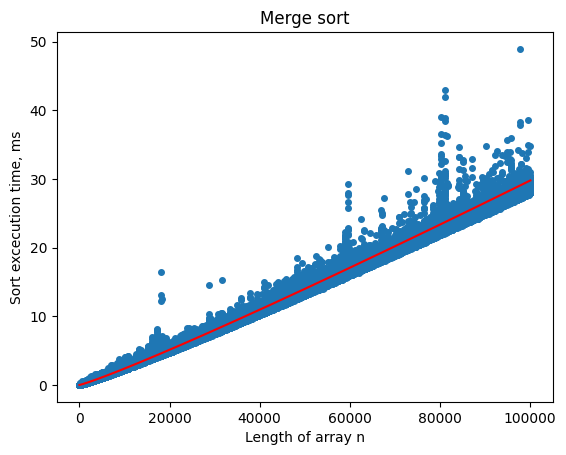

In [104]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in qsortrange]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (5.6 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=4, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Merge sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

In [2]:
def sort5(a, b, c, d, e):
    'Sort 5 values with 7 Comparisons'
    if a < b:      a, b = b, a
    if c < d:      c, d = d, c
    if a < c:      a, b, c, d = c, d, a, b
    if e < c:
        if e < d:  pass
        else:      d, e = e, d
    else:
        if e < a:  c, d, e = e, c, d
        else:      a, c, d, e = e, a, c, d
    if b < d:
        if b < e:  return b, e, d, c, a
        else:      return e, b, d, c, a
    else:
        if b < c:  return e, d, b, c, a
        else:      return e, d, c, b, a
from itertools import permutations
assert all(list(sort5(*p)) == sorted(p) for p in permutations(range(5)))

AssertionError: 